In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, KFold

# Carregando as variáveis train e validation do dataset UNSW Train50

In [5]:
import pickle

In [6]:
with open('df_unsw_train50_with_preprocessing_getdummies_minmax', mode = 'rb') as f:
    X_train50_train, X_train50_test, y_train50_multiclass_train, y_train50_multiclass_test, y_train50_binary_train, y_train50_binary_test = pickle.load(f)

In [7]:
print('X treino = ', X_train50_train.shape)
print('X teste = ', X_train50_test.shape)
print('y multiclasse treino = ', y_train50_multiclass_train.shape)
print('y multiclasse teste = ', y_train50_multiclass_test.shape)
print('y binário treino = ', y_train50_binary_train.shape)
print('y binário teste = ', y_train50_binary_test.shape)

X treino =  (888903, 209)
X teste =  (380959, 209)
y multiclasse treino =  (888903,)
y multiclasse teste =  (380959,)
y binário treino =  (888903,)
y binário teste =  (380959,)


In [8]:
#X_train50_train.head()
X_train50_train

array([[1.40531784e-07, 2.88107071e-04, 1.67558916e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.76344888e-06, 1.33744095e-04, 2.94183243e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.76941473e-06, 2.95351543e-05, 6.02011348e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.02859494e-10, 7.94105563e-06, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.54289241e-10, 7.94105563e-06, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.05094116e-06, 3.38679057e-04, 5.27210210e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [9]:
#print(y_train50_multiclass_train.unique())
#print(y_train50_binary_train.unique())
print(y_train50_multiclass_train)
print(y_train50_binary_train)

152963      Benign
627588      Benign
37398       Benign
486419      Benign
1203796     Benign
            ...   
110268      Benign
259178      Benign
131932     Generic
671155     Generic
121958      Benign
Name: Label_multiclass, Length: 888903, dtype: object
152963     0
627588     0
37398      0
486419     0
1203796    0
          ..
110268     0
259178     0
131932     1
671155     1
121958     0
Name: Label_binary, Length: 888903, dtype: int64


In [10]:
print(type(X_train50_train))
print(type(y_train50_multiclass_train))
print(type(y_train50_binary_train))
print(type(X_train50_test))
print(type(y_train50_multiclass_test))
print(type(y_train50_binary_test))

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [11]:
#X_train50_train = X_train50_train.to_numpy()
y_train50_multiclass_train = y_train50_multiclass_train.to_numpy()
y_train50_binary_train = y_train50_binary_train.to_numpy()
#X_train50_test = X_train50_test.to_numpy()
y_train50_multiclass_test = y_train50_multiclass_test.to_numpy()
y_train50_binary_test = y_train50_binary_test.to_numpy()

In [12]:
print(type(X_train50_train))
print(type(y_train50_multiclass_train))
print(type(y_train50_binary_train))
print(type(X_train50_test))
print(type(y_train50_multiclass_test))
print(type(y_train50_binary_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


# Carregando as variáveis do dataset UNSW Test50

In [13]:
with open('df_unsw_test50_with_preprocessing_getdummies_minmax', mode = 'rb') as f:
    X_test50, y_test50_multiclass, y_test50_binary = pickle.load(f)

In [14]:
print('X = ', X_test50.shape)
print('y multiclasse = ', y_test50_multiclass.shape)
print('y binário = ', y_test50_binary.shape)

X =  (1269864, 209)
y multiclasse =  (1269864,)
y binário =  (1269864,)


In [15]:
print(type(X_test50))
print(type(y_test50_multiclass))
print(type(y_test50_binary))

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [16]:
y_test50_multiclass = y_test50_multiclass.to_numpy()
y_test50_binary = y_test50_binary.to_numpy()

In [17]:
print(type(X_test50))
print(type(y_test50_multiclass))
print(type(y_test50_binary))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [18]:
#y_test50_binary.value_counts()
y_test50_binary

array([0, 0, 0, ..., 0, 0, 0])

In [19]:
#y_test50_multiclass.value_counts()
y_test50_multiclass

array(['Benign', 'Benign', 'Benign', ..., 'Benign', 'Benign', 'Benign'],
      dtype=object)

In [20]:
#X_test50.head()
X_test50

array([[2.92892409e-08, 9.05558976e-06, 1.10523389e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.64863197e-08, 1.01701239e-05, 1.21439279e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.31433861e-10, 1.83898130e-05, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.46883357e-07, 1.42660368e-04, 1.64420597e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.65139889e-05, 9.51672825e-04, 3.74016606e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.84637935e-07, 2.58864482e-03, 2.30598182e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [21]:
#print(y_test50_multiclass.unique())
#print(y_test50_binary.unique())
print(y_test50_multiclass)
print(y_test50_binary)

['Benign' 'Benign' 'Benign' ... 'Benign' 'Benign' 'Benign']
[0 0 0 ... 0 0 0]


In [22]:
#X_test50.shape

In [23]:
# verifica detalhes das variáveis
# variáveis nominais: #proto #state #service #ct_ftp_cmd
#df_unsw_full.shape
#df_unsw_full.describe()
#df_unsw_full.dtypes
#y_test50_multiclass.value_counts()
#np.unique(df_unsw_full['sport'])
#len(np.unique(df_unsw_full.ct_ftp_cmd))

# Algoritmo RandomForest para Train e Validation - Train50

In [24]:
from sklearn.ensemble import RandomForestClassifier

### Predição train50 binária

In [25]:
rforest_train50_binary = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=42)

In [26]:
rforest_train50_binary.fit(X_train50_train, y_train50_binary_train)

RandomForestClassifier(max_depth=8, random_state=42)

In [27]:
predict_train50_binary = rforest_train50_binary.predict(X_train50_test)

In [28]:
predict_train50_binary

array([0, 0, 0, ..., 0, 0, 0])

In [29]:
y_train50_binary_test

array([0, 0, 0, ..., 0, 0, 0])

In [30]:
accuracy_score(y_train50_binary_test, predict_train50_binary)

0.9964615614803692

### Visualização da árvore binária

In [31]:
from sklearn import tree
from dtreeviz.trees import dtreeviz
from matplotlib import pyplot as plt
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

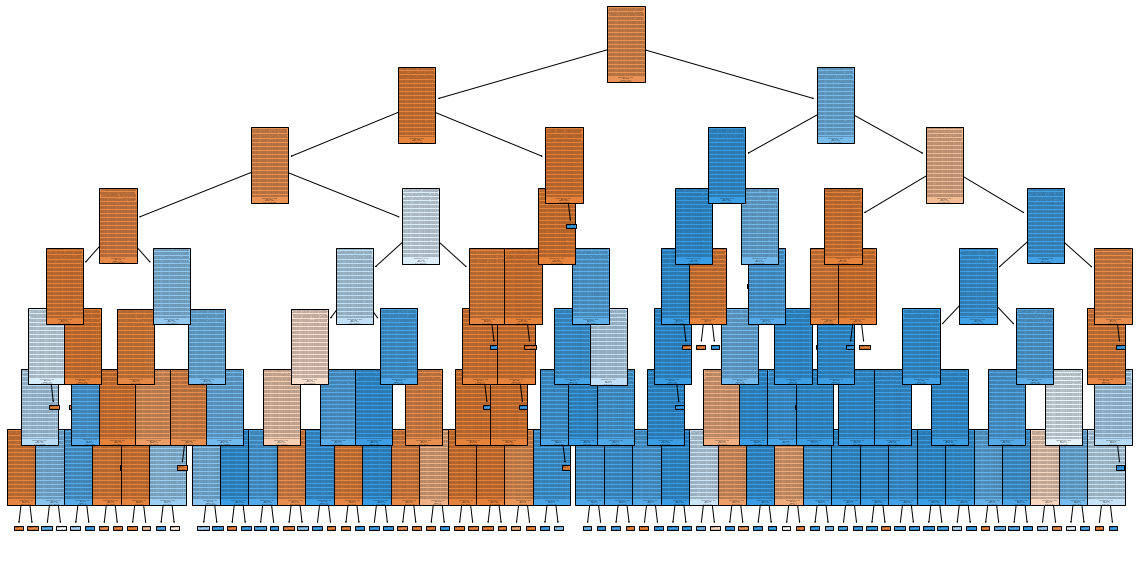

In [32]:
plt.figure(figsize=(20,10))
grafic = tree.plot_tree(rforest_train50_binary.estimators_[0], feature_names=X_train50_train[:,:], filled=True)

In [33]:
#!pip3 install dtreeviz

In [34]:
#viz = dtreeviz(rforest_train50_binary.estimators_[0], X_train50_train, y_train50_binary_train, feature_names=X_train50_train[:,:], target_name='Label_binary')
#viz

### Predição train50 multiclasse

In [35]:
rforest_train50_multiclass = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=42)

In [36]:
rforest_train50_multiclass.fit(X_train50_train, y_train50_multiclass_train)

RandomForestClassifier(max_depth=8, random_state=42)

In [37]:
predict_train50_multiclass = rforest_train50_multiclass.predict(X_train50_test)

In [38]:
predict_train50_multiclass

array(['Benign', 'Benign', 'Benign', ..., 'Benign', 'Benign', 'Benign'],
      dtype=object)

In [39]:
y_train50_multiclass_test

array(['Benign', 'Benign', 'Benign', ..., 'Benign', 'Benign', 'Benign'],
      dtype=object)

In [40]:
accuracy_score(y_train50_multiclass_test, predict_train50_multiclass)

0.9818878146992196

### Visualização da árvore multiclasse

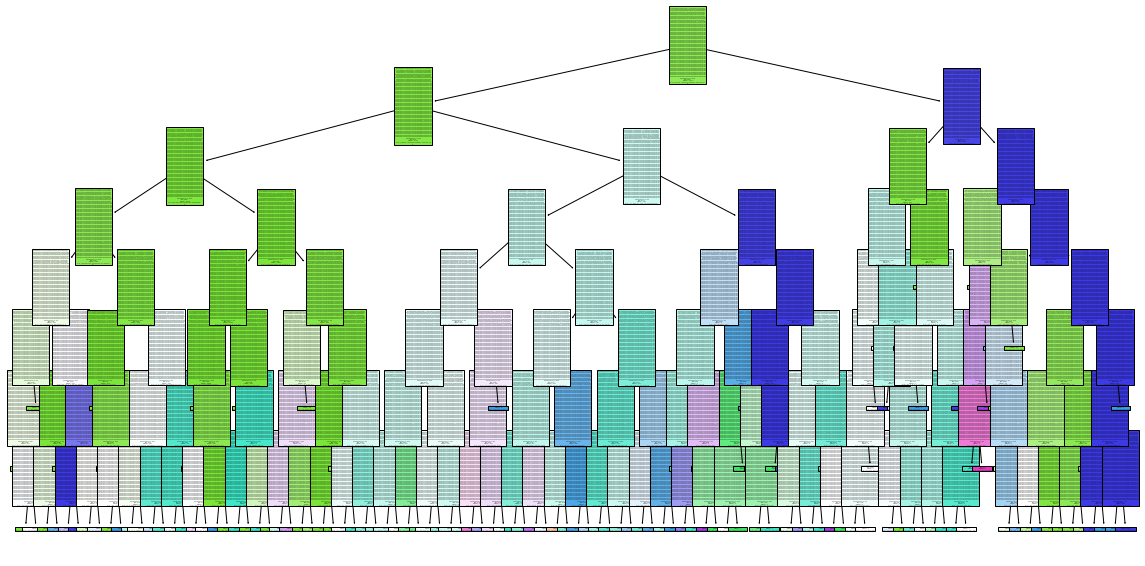

In [41]:
plt.figure(figsize=(20,10))
grafic = tree.plot_tree(rforest_train50_multiclass.estimators_[0], feature_names=X_train50_train[:,:], filled=True)

In [42]:
#viz = dtreeviz(rforest_train50_multiclass.estimators_[0], X_train50_train, y_train50_multiclass_train, feature_names=X_train50_train.columns, target_name='Label_multiclass')
#viz

### Precision e Recall do train50

In [43]:
print(classification_report(y_train50_binary_test, predict_train50_binary, digits=6, zero_division=1))

              precision    recall  f1-score   support

           0   0.999906  0.996043  0.997971    332789
           1   0.973370  0.999356  0.986192     48170

    accuracy                       0.996462    380959
   macro avg   0.986638  0.997699  0.992081    380959
weighted avg   0.996551  0.996462  0.996481    380959



In [44]:
print(classification_report(y_train50_multiclass_test, predict_train50_multiclass, digits=6, zero_division=1))

                precision    recall  f1-score   support

      Analysis   1.000000  0.000000  0.000000       390
      Backdoor   1.000000  0.000000  0.000000       353
        Benign   0.998451  0.997653  0.998052    332789
           DoS   0.739583  0.057771  0.107170      2458
      Exploits   0.567286  0.957183  0.712374      6703
       Fuzzers   0.704593  0.737497  0.720670      3619
       Generic   0.999459  0.972391  0.985739     32272
Reconnaissance   0.825515  0.681303  0.746508      2118
     Shellcode   1.000000  0.000000  0.000000       229
         Worms   1.000000  0.000000  0.000000        28

      accuracy                       0.981888    380959
     macro avg   0.883489  0.440380  0.427051    380959
  weighted avg   0.985531  0.981888  0.979581    380959



### Cross Validation do train50

In [45]:
# cross validation binary
cv_result_train50_binary = []
kfold = KFold(n_splits=10, shuffle=True, random_state=42)   
score_cv_train50_binary = cross_val_score(rforest_train50_binary, X_train50_train, y_train50_binary_train, cv=kfold)
cv_result_train50_binary.append(score_cv_train50_binary.mean())

In [46]:
score_cv_train50_binary

array([0.99667008, 0.99641134, 0.99643383, 0.99665879, 0.99672629,
       0.99646754, 0.9963663 , 0.99669254, 0.99662504, 0.9963213 ])

In [47]:
cv_result_train50_binary

[0.9965373050790312]

In [48]:
# cross validation multiclass
cv_result_train50_multiclass = []
kfold = KFold(n_splits=10, shuffle=True, random_state=42)   
score_cv_train50_multiclass = cross_val_score(rforest_train50_multiclass, X_train50_train, y_train50_multiclass_train, cv=kfold)
cv_result_train50_multiclass.append(score_cv_train50_multiclass.mean())

In [49]:
score_cv_train50_multiclass

array([0.98232667, 0.98243917, 0.98179793, 0.98228147, 0.98170773,
       0.98166273, 0.98191023, 0.98130273, 0.98258522, 0.98189898])

In [50]:
cv_result_train50_multiclass

[0.9819912852246944]

### Matriz de Confusão do train50

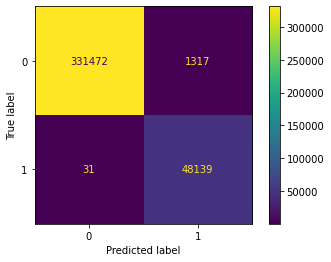

In [51]:
ConfusionMatrixDisplay.from_estimator(rforest_train50_binary, X_train50_test, y_train50_binary_test)
plt.show()

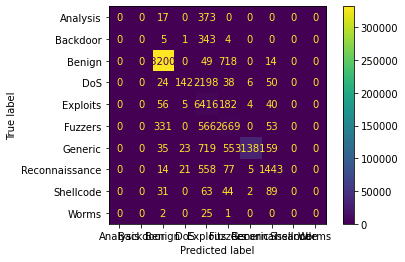

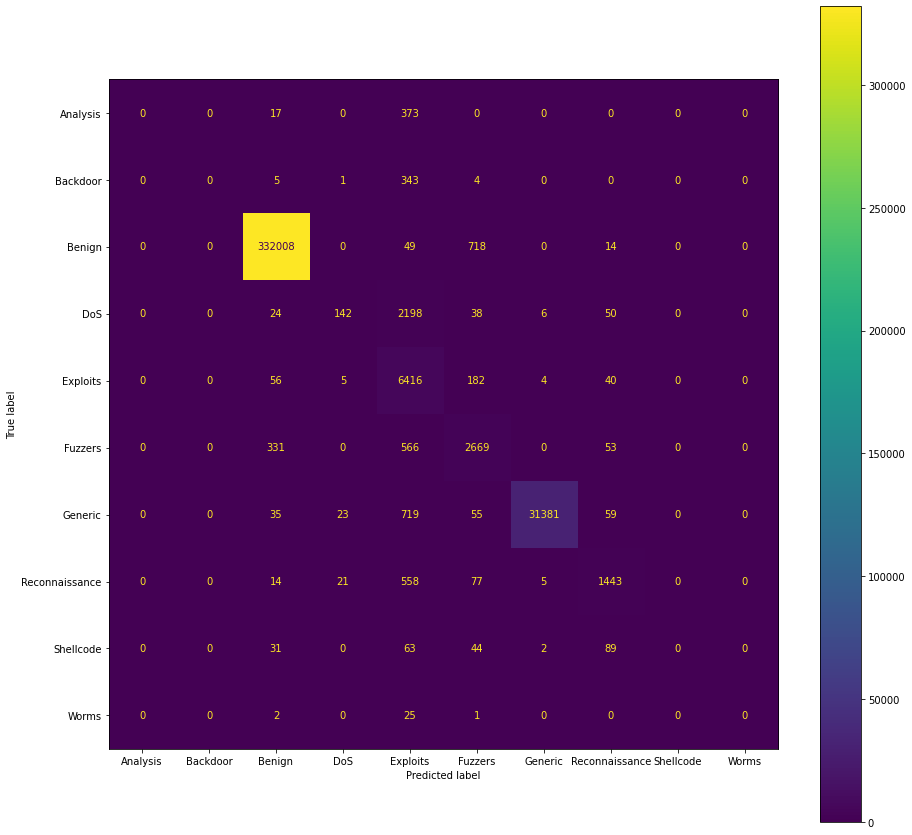

In [52]:
#ConfusionMatrixDisplay.from_estimator(xgb_train50_multiclass, X_train50_test, y_train50_multiclass_test)
#plt.show()

cm_rforest_multiclass_train = ConfusionMatrixDisplay.from_estimator(rforest_train50_multiclass, X_train50_test, y_train50_multiclass_test)
fig, ax = plt.subplots(figsize=(15,15))
cm_rforest_multiclass_train.plot(ax=ax)

# Algoritmo RandomForest para Test50

### Predição Test50 binária

In [53]:
predict_test50_binary = rforest_train50_binary.predict(X_test50)

In [54]:
predict_test50_binary

array([0, 0, 1, ..., 0, 0, 0])

In [55]:
y_test50_binary

array([0, 0, 0, ..., 0, 0, 0])

In [56]:
accuracy_score(y_test50_binary, predict_test50_binary)

0.8072588875659126

### Predição test50 multiclasse

In [57]:
predict_test50_multiclass = rforest_train50_multiclass.predict(X_test50)

In [58]:
predict_test50_multiclass

array(['Benign', 'Benign', 'Benign', ..., 'Benign', 'Benign', 'Benign'],
      dtype=object)

In [59]:
y_test50_multiclass

array(['Benign', 'Benign', 'Benign', ..., 'Benign', 'Benign', 'Benign'],
      dtype=object)

In [60]:
accuracy_score(y_test50_multiclass, predict_test50_multiclass)

0.9570024821555694

### Precision e Recall do test50

In [61]:
print(classification_report(y_test50_binary, predict_test50_binary, digits=6, zero_division=1))

              precision    recall  f1-score   support

           0   0.999995  0.779350  0.875992   1109226
           1   0.396250  0.999975  0.567588    160638

    accuracy                       0.807259   1269864
   macro avg   0.698123  0.889662  0.721790   1269864
weighted avg   0.923622  0.807259  0.836979   1269864



In [62]:
print(classification_report(y_test50_multiclass, predict_test50_multiclass, digits=6, zero_division=1))

                precision    recall  f1-score   support

      Analysis   1.000000  0.000000  0.000000      1338
      Backdoor   1.000000  0.000000  0.000000      1164
        Benign   0.999990  0.969629  0.984576   1109226
           DoS   0.333730  0.686399  0.449104      8176
      Exploits   0.562517  0.652143  0.604023     22262
       Fuzzers   0.292808  0.801617  0.428937     12123
       Generic   0.945513  0.977984  0.961475    107740
Reconnaissance   0.638578  0.644788  0.641668      6993
     Shellcode   1.000000  0.000000  0.000000       755
         Worms   1.000000  0.000000  0.000000        87

      accuracy                       0.957002   1269864
     macro avg   0.777314  0.473256  0.406978   1269864
  weighted avg   0.974667  0.957002  0.962711   1269864



### Matriz de Confusão do test50

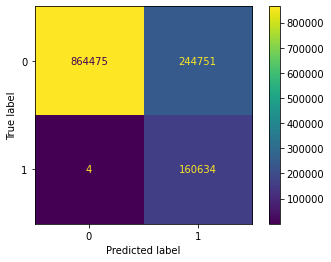

In [63]:
ConfusionMatrixDisplay.from_estimator(rforest_train50_binary, X_test50, y_test50_binary)
plt.show()

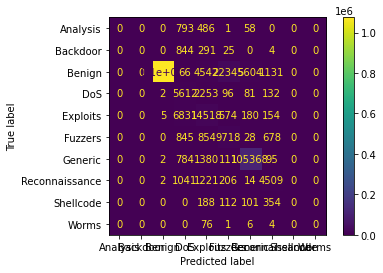

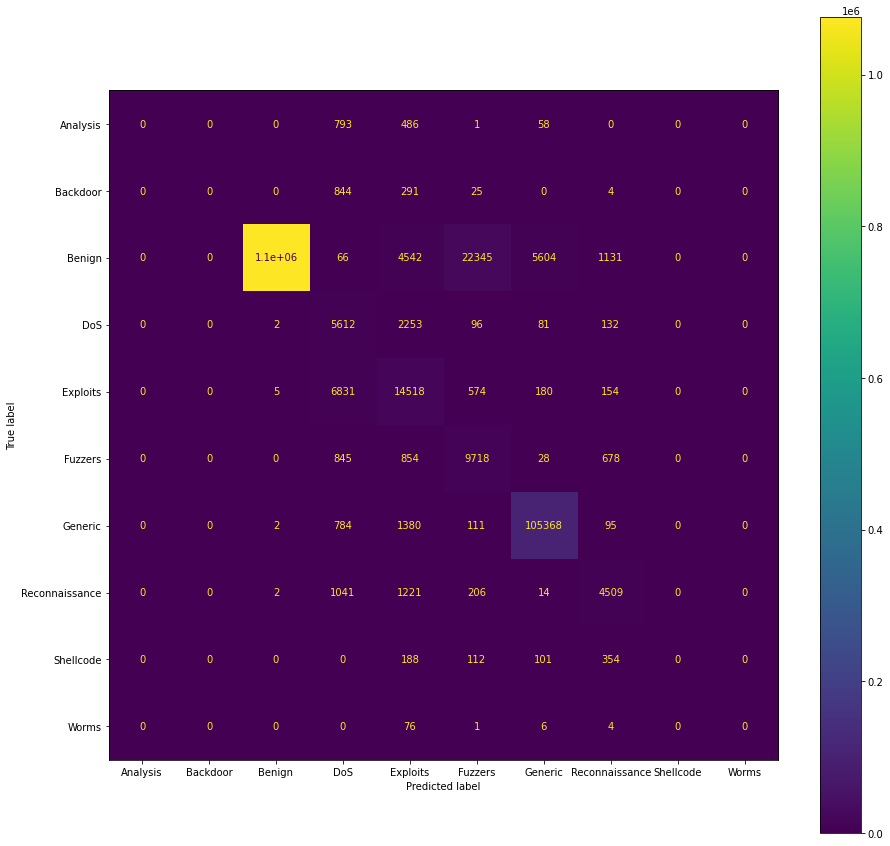

In [64]:
#ConfusionMatrixDisplay.from_estimator(xgb_train50_multiclass, X_test50, y_test50_multiclass)
#plt.show()

cm_rforest_multiclass_train = ConfusionMatrixDisplay.from_estimator(rforest_train50_multiclass, X_test50, y_test50_multiclass)
fig, ax = plt.subplots(figsize=(15,15))
cm_rforest_multiclass_train.plot(ax=ax)